# Pokemon Multivariate & Inferential Analysis (Gen 1-8)
**Author:** Francisco Solís Pedraza  

This notebook unifies descriptive statistics, multivariate exploration, and inferential modeling to understand the balance and evolution of the Pokemon franchise.

---

## 1. Data Preparation
We load the dataset and perform initial cleaning, focusing on the base statistics and the generation era.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.diagnostic import het_breuschpagan, lilliefors

In [2]:
# Load dataset
try:
    df = pd.read_csv("../data/pokemon_final.csv")
    stats_cols = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: Please ensure '../data/Pokemon_final.csv' exists.")

df.head()

Dataset loaded successfully.


,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,0
4,3,Gigantamax Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0


## 2. Exploratory Multivariate Analysis
A multivariate approach allows us to see how all combat statistics are distributed and how they relate to each other.

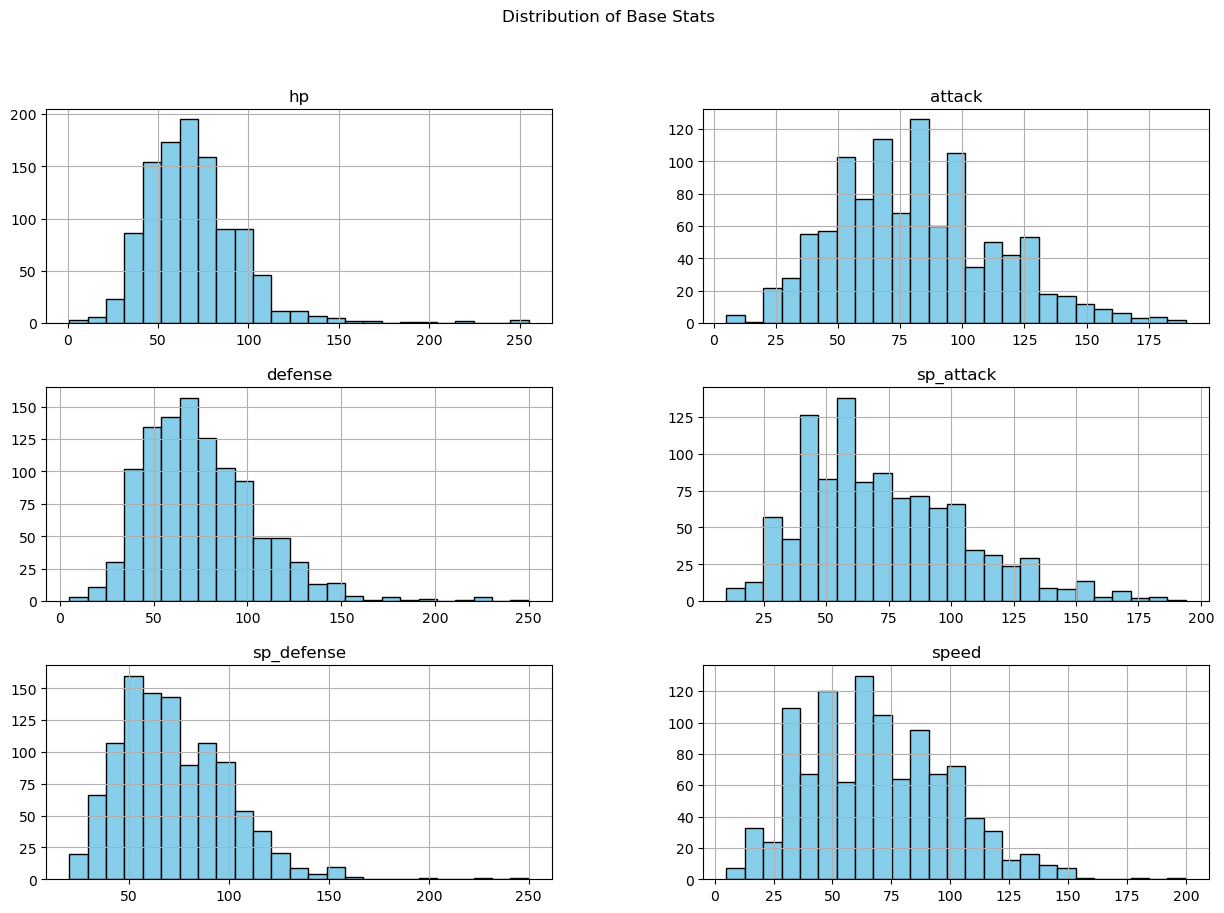

In [3]:
# Histograms for all base stats
df[stats_cols].hist(bins=25, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Base Stats')
plt.show()

### Correlation Matrix
Using a heatmap to identify strong relationships between variables.

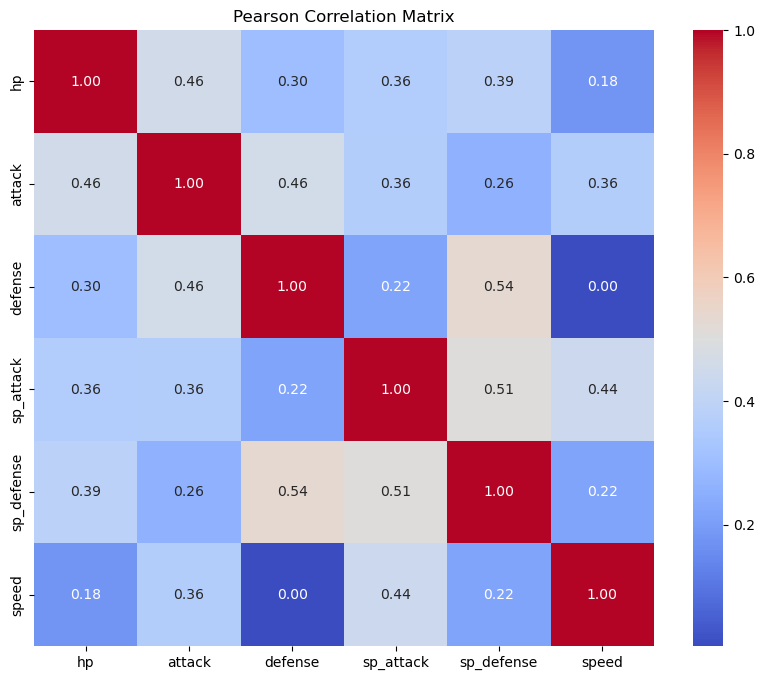

In [4]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[stats_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Pearson Correlation Matrix')
plt.show()

## 3. Generational Power Creep Analysis
We compare the **Classic Era (Gen 1-4)** against the **Modern Era (Gen 5-8)** to test the "Power Creep" hypothesis.

Classic Era (Gen 1-4) Mean Attack: 78.65
Modern Era (Gen 5-8) Mean Attack: 83.49


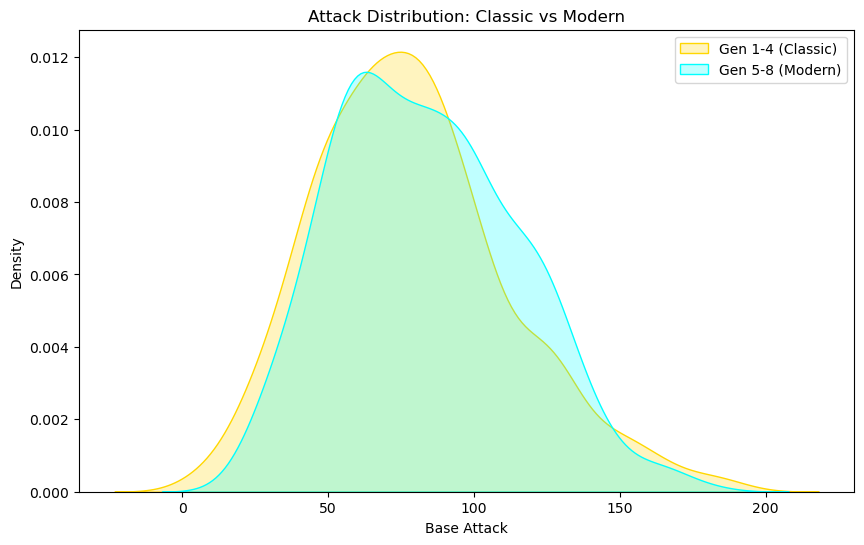

In [5]:
m1 = df[df['generation'].isin([1, 2, 3, 4])]
m2 = df[df['generation'].isin([5, 6, 7, 8])]

# Comparison of Mean Attack
print(f"Classic Era (Gen 1-4) Mean Attack: {m1['attack'].mean():.2f}")
print(f"Modern Era (Gen 5-8) Mean Attack: {m2['attack'].mean():.2f}")

# Density Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(m1['attack'], fill=True, label='Gen 1-4 (Classic)', color='gold')
sns.kdeplot(m2['attack'], fill=True, label='Gen 5-8 (Modern)', color='cyan')
plt.title('Attack Distribution: Classic vs Modern')
plt.xlabel('Base Attack')
plt.legend()
plt.show()

## 4. Inferential Modeling: Simple Linear Regression
We test if **HP** is a significant predictor of **Attack** within the Classic Era.

In [6]:
# OLS Regression
X = sm.add_constant(m1['hp'])
y = m1['attack']
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 attack   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     101.4
Date:                Sun, 11 Jan 2026   Prob (F-statistic):           4.79e-22
Time:                        23:50:40   Log-Likelihood:                -2736.6
No. Observations:                 565   AIC:                             5477.
Df Residuals:                     563   BIC:                             5486.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.6367      3.525     12.948      0.0

### Statistical Diagnostics (Assumptions)
Validating the model using **Lilliefors** for normality and **Breusch-Pagan** for homoscedasticity.

In [7]:
residuos = model.resid
_, p_lillie = lilliefors(residuos)
_, p_bp, _, _ = het_breuschpagan(residuos, model.model.exog)

print(f"Normality Test (p-value): {p_lillie:.4e}")
print(f"Homoscedasticity Test (p-value): {p_bp:.4e}")

Normality Test (p-value): 1.0000e-03
Homoscedasticity Test (p-value): 1.6003e-21


## 5. Conclusions
* **Power Creep:** There is a statistically significant increase in the Attack stat in modern generations.
* **Correlations:** Defensive stats show the strongest internal correlation within the dataset.
* **Model Validity:** Although the relationship between HP and Attack is significant, the violation of normality in residuals suggests the presence of specific outliers (tiers) in Pokémon design.